In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
## Display all the columns of the dataframes
pd.pandas.set_option('display.max_columns',None)

In [7]:
df = pd.read_csv('vehicles.csv')

In [9]:
df.shape

(426880, 26)

In [11]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [12]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [28]:
for feature in df.columns:
    print(feature, "==>", np.round(df[feature].isna().mean()*100))

id ==> 0.0
url ==> 0.0
region ==> 0.0
region_url ==> 0.0
price ==> 0.0
year ==> 0.0
manufacturer ==> 4.0
model ==> 1.0
condition ==> 41.0
cylinders ==> 42.0
fuel ==> 1.0
odometer ==> 1.0
title_status ==> 2.0
transmission ==> 1.0
VIN ==> 38.0
drive ==> 31.0
size ==> 72.0
type ==> 22.0
paint_color ==> 31.0
image_url ==> 0.0
description ==> 0.0
county ==> 100.0
state ==> 0.0
lat ==> 2.0
long ==> 2.0
posting_date ==> 0.0


In [32]:
for feature in df.columns:
    if np.round(df[feature].isna().mean()*100) > 15.0 :
                print(feature, "==>", np.round(df[feature].isna().mean()*100))

condition ==> 41.0
cylinders ==> 42.0
VIN ==> 38.0
drive ==> 31.0
size ==> 72.0
type ==> 22.0
paint_color ==> 31.0
county ==> 100.0


In [35]:
df.nunique(axis=0)
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,id,price,year,odometer,county,lat,long
count,426880.000000,426880.000000,425675.000000,422480.000000,0.000000,420331.000000,420331.000000
mean,7311486634.224333,75199.033187,2011.235191,98043.331443,nan,38.493940,-94.748599
std,4473170.412559,12182282.173604,9.452120,213881.500798,nan,5.841533,18.365462
min,7207408119.000000,0.000000,1900.000000,0.000000,nan,-84.122245,-159.827728
25%,7308143339.250000,5900.000000,2008.000000,37704.000000,nan,34.601900,-111.939847
50%,7312620821.000000,13950.000000,2013.000000,85548.000000,nan,39.150100,-88.432600
75%,7315253543.500000,26485.750000,2017.000000,133542.500000,nan,42.398900,-80.832039
max,7317101084.000000,3736928711.000000,2022.000000,10000000.000000,nan,82.390818,173.885502


In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,426880.0,7.311487e+09,4.473170e+06,7.207408e+09,7.308143e+09,7.312621e+09,7.315254e+09,7.317101e+09
price,426880.0,7.519903e+04,1.218228e+07,0.000000e+00,5.900000e+03,1.395000e+04,2.648575e+04,3.736929e+09
year,425675.0,2.011235e+03,9.452120e+00,1.900000e+03,2.008000e+03,2.013000e+03,2.017000e+03,2.022000e+03
odometer,422480.0,9.804333e+04,2.138815e+05,0.000000e+00,3.770400e+04,8.554800e+04,1.335425e+05,1.000000e+07
county,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,420331.0,3.849394e+01,5.841533e+00,-8.412225e+01,3.460190e+01,3.915010e+01,4.239890e+01,8.239082e+01
long,420331.0,-9.474860e+01,1.836546e+01,-1.598277e+02,-1.119398e+02,-8.843260e+01,-8.083204e+01,1.738855e+02


In [39]:
df.condition.unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [40]:
df.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN


In [46]:
df_cleaned = df.copy()

In [50]:
df_cleaned.drop(columns=['url','image_url'],inplace=True)

In [51]:
df_cleaned.shape

(426880, 24)

In [60]:
for feature in df_cleaned.columns:
    if np.round(df_cleaned[feature].isna().mean()*100) > 15.0 :
                print(feature, "==>", np.round(df_cleaned[feature].isna().mean()*100))

In [59]:
for i in df_cleaned.columns:
    if np.round(df_cleaned[i].isna().mean()*100) > 15.0 :
        print(i, np.round(df_cleaned[i].isna().mean()*100) )
        df_cleaned.drop(columns=[i],inplace=True)

condition 41.0
cylinders 42.0
VIN 38.0
drive 31.0
size 72.0
type 22.0
paint_color 31.0
county 100.0


In [64]:
df_cleaned.columns

Index(['id', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'description',
       'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [74]:
df_cleaned.drop(columns=['id'],inplace=True)

In [75]:
df_cleaned.shape

(426880, 14)

<AxesSubplot:>

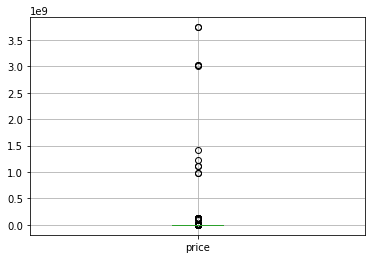

In [69]:
df_cleaned.boxplot(column='price')

In [79]:
df_cleaned[['region']].head(100)

,region
0,prescott
1,fayetteville
2,florida keys
3,worcester / central MA
4,greensboro
...,...
95,auburn
96,auburn
97,auburn
98,auburn


In [80]:
df_cleaned.isna().sum()

region              0
price               0
year             1205
manufacturer    17646
model            5277
fuel             3013
odometer         4400
title_status     8242
transmission     2556
description        70
state               0
lat              6549
long             6549
posting_date       68
dtype: int64

In [81]:
df_cleaned.dropna(axis=0,inplace=True)

In [82]:
df_cleaned.shape

(383487, 14)

<AxesSubplot:>

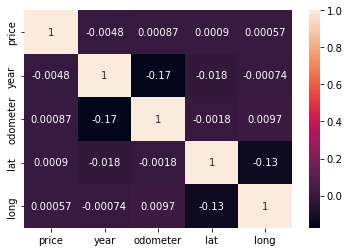

In [87]:
corr = df_cleaned.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True)

<AxesSubplot:xlabel='odometer', ylabel='long'>

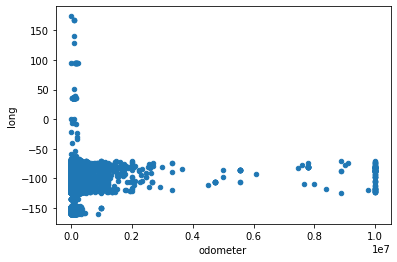

In [89]:
df_cleaned.plot(kind='scatter', x='odometer',y='long')

<AxesSubplot:xlabel='odometer', ylabel='price'>

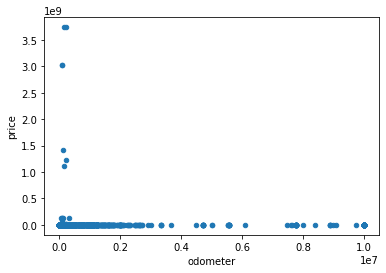

In [91]:
df_cleaned.plot(kind='scatter', x='odometer',y='price')

In [ ]:
sns.pairplot(df_cleaned)